In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Avogadro as N, Boltzmann as k_0

1. Initialization (position, velocity, potential, steps, dt, constants, mass)
2. Estimate/Calculate force and acceleration given potential
3. Update position and velocity (Velocity Verlet Algorithm)
4. Total Energy (KE + PE), position, momentum

In [2]:
#Initialize

#Initial position
pos = np.array([[1, 2], [5, 6], [10, 11]])

#time-step
dt = 0.01 #pico-sec

#number-of-steps
steps = 1000

#temperatures
temp = 273

#Inert gas = Ar
mass = (39.95/N)*1e-3 #in kg
epsilon = 0.0104 #in eV
sigma = 3.40 #in Å

In [3]:
def LJ_Force(epsilon, sigma, x):
    return 4*epsilon*(12*((sigma)**12/(x)**13)-6*((sigma)**6/(x)**7))

In [4]:
np.random.rand(2, 3)

array([[0.90711183, 0.44329287, 0.87354722],
       [0.35581938, 0.00412544, 0.00402531]])

In [5]:

def get_acc(pos, epsilon, sigma, mass):
    a = np.zeros((pos.shape[0], pos.shape[0], pos.shape[1]))

    for i in range(0, pos.shape[0]-1):
        for j in range(i+1, pos.shape[0]):
            # print(i, j)
            r_ij = pos[j]-pos[i]
            r_mag = np.linalg.norm(r_ij)
            f_scalar = LJ_Force(epsilon, sigma, r_mag)
            force = f_scalar * (r_ij/r_mag)
            a[i, j] = (force/mass)*1.602e-23 #in Å/picosec^2
            a[j, i] = -a[i, j]
    return np.sum(a, axis=0)

In [6]:
# Boltzmann in J/K

def init_vel(pos, temp, mass):
    #in Å/picosec
    # rng = np.random.default_rng(None)
    # randvec = rng.normal(size=(pos.shape[0], pos.shape[1]))
    randvec = np.random.rand(pos.shape[0], pos.shape[1])-0.5
    randvec /= np.linalg.norm(randvec, axis=1, keepdims=True)
    # print(np.linalg.norm(randvec))
    vel = randvec*np.sqrt((2*k_0*temp)/mass) * 1e-2
    return vel
# np.random.rand?

In [7]:
#update position and velocity
pos_steps = np.zeros((steps, pos.shape[0], pos.shape[1]))
vel_steps = np.zeros((steps, pos.shape[0], pos.shape[1]))

vel = init_vel(pos, temp, mass)
acc = get_acc(pos, epsilon, sigma, mass)

vel_half = np.zeros(pos.shape)
newpos = np.zeros(pos.shape)
newacc = np.zeros(pos.shape)
newvel = np.zeros(pos.shape)

for i in range(steps):
    vel_half = vel + 0.5*acc*dt
    newpos = pos + vel_half*dt
    newacc = get_acc(newpos, epsilon, sigma, mass)
    newvel = vel_half + 0.5*newacc*dt
    pos_steps[i,:,:] = newpos
    vel_steps[i,:,:] = newvel
    vel = newvel
    pos = newpos
    acc = newacc

In [8]:
pos_steps

array([[[  1.02550966,   1.97796109],
        [  5.00543349,   5.96672065],
        [ 10.00317491,  11.03355582]],

       [[  1.05105238,   1.95595532],
        [  5.01084094,   5.93341528],
        [ 10.0063428 ,  11.06710452]],

       [[  1.07662897,   1.93398357],
        [  5.0162212 ,   5.90008275],
        [ 10.00950402,  11.10064637]],

       ...,

       [[ 16.14117656, -33.69747247],
        [ 20.88269451, -13.32291238],
        [ 13.02595392,  44.30147327]],

       [[ 16.15547349, -33.73413436],
        [ 20.89948699, -13.34137503],
        [ 13.02898258,  44.33483537]],

       [[ 16.16977042, -33.77079624],
        [ 20.91627945, -13.35983769],
        [ 13.03201124,  44.36819747]]])

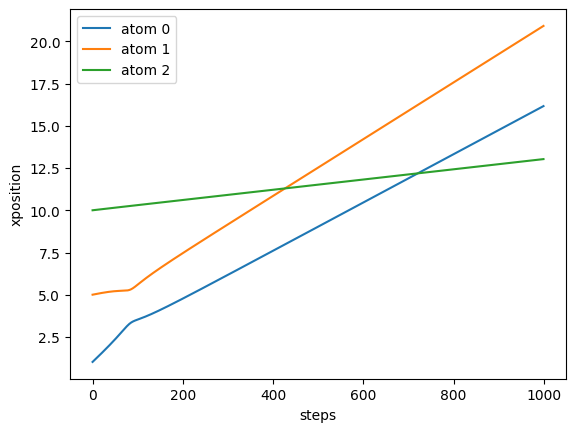

In [9]:
for i in range(pos_steps.shape[1]):
    plt.plot(pos_steps[:, i, 0], label='atom '+str(i))
plt.xlabel('steps')
plt.ylabel('xposition')
plt.legend()
plt.show()

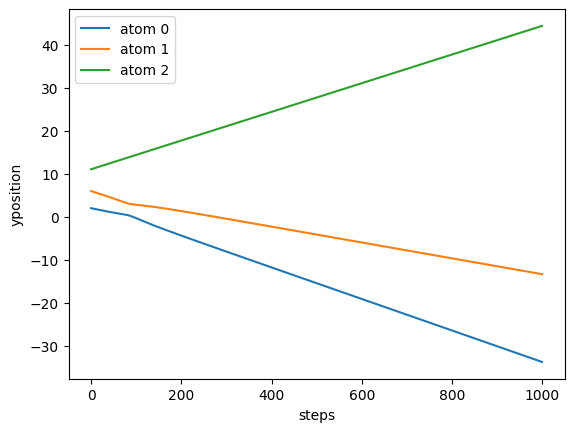

In [10]:
for i in range(pos_steps.shape[1]):
    plt.plot(pos_steps[:, i, 1], label='atom '+str(i))
plt.xlabel('steps')
plt.ylabel('yposition')
plt.legend()
plt.show()

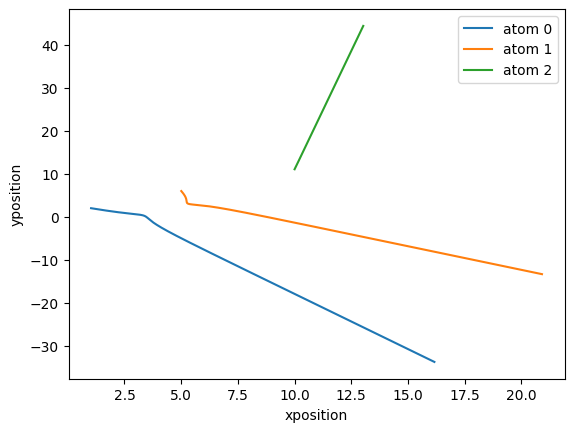

In [11]:
for i in range(pos_steps.shape[1]):
    plt.plot(pos_steps[:, i, 0], pos_steps[:, i, 1], label='atom '+str(i))
plt.xlabel('xposition')
plt.ylabel('yposition')
plt.legend()
plt.show()

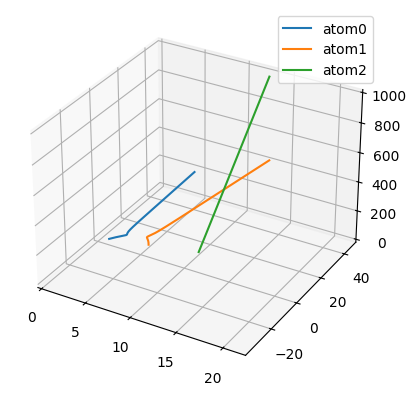

In [12]:
ax = plt.figure().add_subplot(projection='3d')
for i in range(pos_steps.shape[1]):
    ax.plot(pos_steps[:, i, 0], pos_steps[:, i, 1], np.arange(0, steps), label='atom' + str(i))
ax.legend()

plt.show()

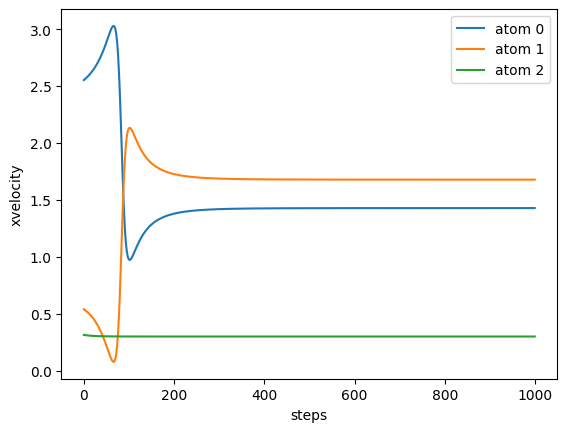

In [13]:
for i in range(vel_steps.shape[1]):
    plt.plot(vel_steps[:, i, 0], label='atom '+str(i))
plt.xlabel('steps')
plt.ylabel('xvelocity')
plt.legend()
plt.show()

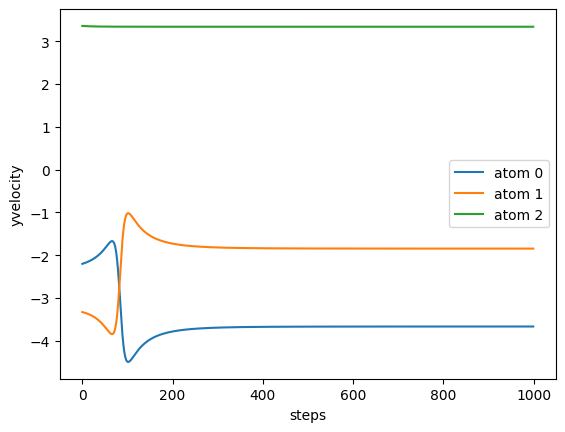

In [14]:
for i in range(vel_steps.shape[1]):
    plt.plot(vel_steps[:, i, 1], label='atom '+str(i))
plt.xlabel('steps')
plt.ylabel('yvelocity')
plt.legend()
plt.show()

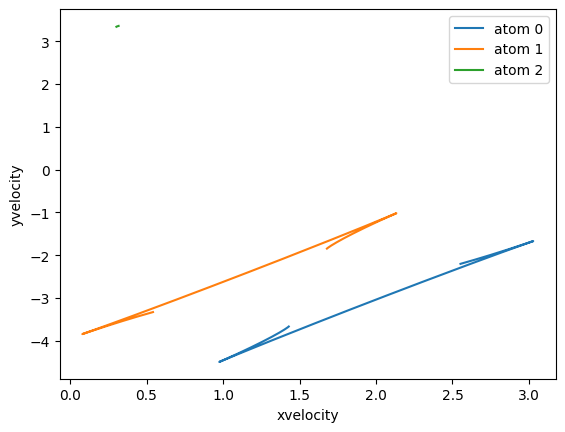

In [15]:
for i in range(vel_steps.shape[1]):
    plt.plot(vel_steps[:, i, 0], vel_steps[:, i, 1], label='atom '+str(i))
plt.xlabel('xvelocity')
plt.ylabel('yvelocity')
plt.legend()
plt.show()

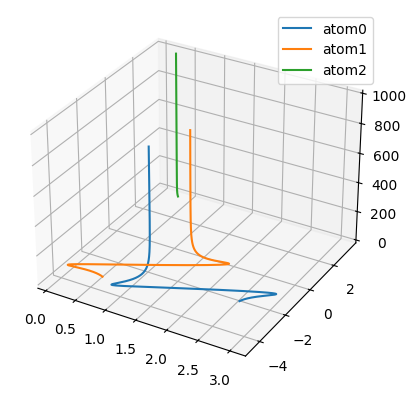

In [16]:
ax = plt.figure().add_subplot(projection='3d')
for i in range(vel_steps.shape[1]):
    ax.plot(vel_steps[:, i, 0], vel_steps[:, i, 1], np.arange(0, steps), label='atom' + str(i))
ax.legend()

plt.show()

In [17]:
class Verlet_Solutions:
    def __init__(self, eps, sig, pos, dt, steps, mass, temp):
        self.epsilon = eps
        self.sigma = sig
        self.pos = pos
        self.dt = dt
        self.steps = steps
        self.mass = mass
        self.temp = temp
        self.num = pos.shape[0]
        self.dim = pos.shape[1] if pos.ndim>1 else 1
    def LJ_Force(self, x):
        return 4*self.epsilon*(12*((self.sigma)**12/(x)**13)-6*((self.sigma)**6/(x)**7))
    def get_acc(self):
        list1 = list(self.pos.shape)
        list1.insert(0, self.num)
        shape = tuple(list1)
        a = np.zeros(shape)
        for i in range(0, self.num-1):
            for j in range(i+1, self.num):
                # print(i, j)
                r_ij = self.pos[j]-self.pos[i]
                r_mag = np.linalg.norm(r_ij)
                f_scalar = self.LJ_Force(r_mag)
                force = f_scalar * (r_ij/r_mag)
                a[i, j] = (force/self.mass)*1.602e-23 #in Å/picosec^2
                a[j, i] = -a[i, j]
        return np.sum(a, axis=0)
    def init_vel(self):
        randvec = np.random.rand(self.num, self.dim)-0.5
        randvec /= np.linalg.norm(randvec, axis=1, keepdims=True)
        vel = randvec*np.sqrt((self.num*k_0*self.temp)/self.mass) * 1e-2
        return vel
    def Update_Pos_Verlet(self, vel, acc, prevpos):
        newpos = 2*self.pos - prevpos + acc*self.dt*self.dt
        newvel = (newpos - prevpos)/(2*self.dt)
        prevpos = self.pos.copy()
        self.pos = newpos
        newacc = self.get_acc()
        return newpos, newvel, newacc, prevpos
    def Update_Vel_Verlet(self, vel, acc, prevpos=None):
        vel_half = vel + 0.5*acc*self.dt
        newpos = self.pos + vel_half*self.dt
        self.pos = newpos
        newacc = self.get_acc()
        newvel = vel_half + 0.5*newacc*self.dt
        return newpos, newvel, newacc, prevpos
    def Update_Euler(self, vel, acc, prevpos=None):
        newpos = self.pos + vel*self.dt
        newvel = vel + acc*self.dt
        self.pos = newpos
        newacc = self.get_acc()
        return newpos, newvel, newacc, prevpos
    def Update_Modified_Euler(self, vel, acc, prevpos=None):
        newvel = vel + acc*self.dt
        newpos = self.pos + newvel*self.dt
        self.pos = newpos
        newacc = self.get_acc()
        return newpos, newvel, newacc, prevpos
    def Return_Solution(self, str):
        list1 = list(self.pos.shape)
        list1.insert(0, self.steps)
        shape = tuple(list1)
        pos_steps = np.zeros(shape)
        vel_steps = np.zeros(shape)

        vel = self.init_vel()
        acc = self.get_acc()

        newpos = np.zeros(self.pos.shape)
        newacc = np.zeros(self.pos.shape)
        newvel = np.zeros(self.pos.shape)
        prevpos = np.zeros(self.pos.shape)
        vel_half = np.zeros(self.pos.shape)
        start = 0
        if(str=="E"): f = self.Update_Euler
        elif (str=="ME"): f = self.Update_Modified_Euler
        elif (str=="VVer"): f = self.Update_Vel_Verlet
        elif (str=="PVer"):
            start = 1
            f = self.Update_Pos_Verlet
            pos_steps[0,:,:] = self.pos
            vel_steps[0,:,:] = vel
            prevpos = self.pos.copy()
            self.pos = self.pos + vel*self.dt + 0.5*acc*(self.dt**2)
        else: return None

        for i in range(start, self.steps):
            newpos, newvel, newacc, prevpos = f(vel, acc, prevpos)
            pos_steps[i,:,:] = newpos
            vel_steps[i,:,:] = newvel
            vel = newvel
            # self.pos = newpos
            acc = newacc
        return pos_steps, vel_steps
    # def total_energy(self, pos, vel):
    #     # --- Kinetic Energy ---
    #     KE = 0.5 * self.mass * np.sum((100*vel)**2)

    #     # --- Potential Energy (Lennard-Jones) ---
    #     PE = 0.0
    #     for i in range(self.num - 1):
    #         for j in range(i + 1, self.num):
    #             r_ij = pos[j] - pos[i]
    #             r_mag = np.linalg.norm(r_ij)
    #             PE += 4 * self.epsilon * ((self.sigma / r_mag)**12 - (self.sigma / r_mag)**6)

    #     # Convert potential energy to Joules (if epsilon is in eV)
    #     PE *= 1.602e-19

    #     return KE + PE, KE, PE
        # DO NOT USE DIRECTLY
    

In [18]:
pos = np.array([[1, 2], [9, 10], [15, 11], [23, 12]])
VS = Verlet_Solutions(epsilon, sigma, pos, dt, steps, mass, temp)
r, v = VS.Return_Solution("VVer")

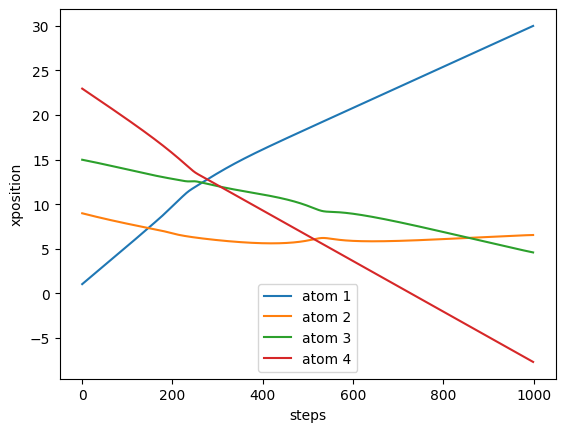

In [19]:
for i in range(r.shape[1]):
    plt.plot(r[:, i, 0], label='atom '+str(i+1))
plt.xlabel('steps')
plt.ylabel('xposition')
plt.legend()
plt.show()

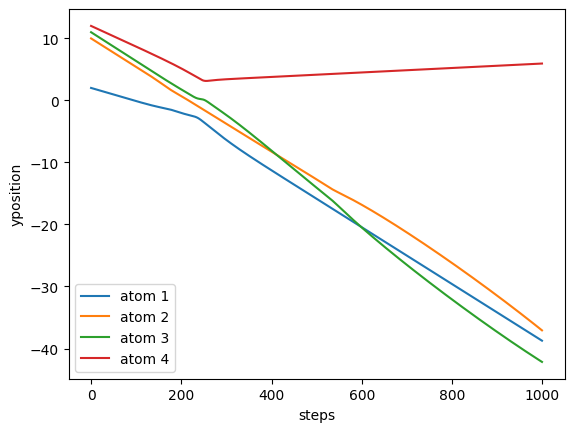

In [20]:
for i in range(r.shape[1]):
    plt.plot(r[:, i, 1], label='atom '+str(i+1))
plt.xlabel('steps')
plt.ylabel('yposition')
plt.legend()
plt.show()

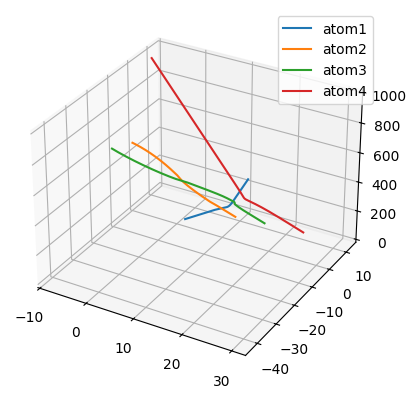

In [21]:
ax = plt.figure().add_subplot(projection='3d')
for i in range(r.shape[1]):
    ax.plot(r[:, i, 0], r[:, i, 1], np.arange(0, steps), label='atom' + str(i+1))
ax.legend()

plt.show()

In [22]:
# TE = np.zeros(steps)
# PE = np.zeros(steps)
# KE = np.zeros(steps)
# for i in range(steps):
#     TE[i], KE[i], PE[i] = VS.total_energy(r[i, :, :], v[i,:,:])
# plt.plot(TE, label="Total Energy")
# # plt.plot(PE, label='Potential Energy')
# # plt.plot(KE, label="Kinetic Energy")
# plt.xlabel('steps')
# plt.ylabel('Energy')
# plt.legend()
# plt.show()

In [23]:
a = np.array([[3, 4], [7, 24]])
np.linalg.norm(a, axis=1)

array([ 5., 25.])